In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from textwrap import fill
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

In [2]:
data = r"data/data.csv"
df = pd.read_csv(data)
df.head()

,Course Name,University,Difficulty Level,Course Rating,Course URL,Course Description,Skills
0,Write A Feature Length Screenplay For Film Or ...,Michigan State University,Beginner,4.8,https://www.coursera.org/learn/write-a-feature...,Write a Full Length Feature Film Script In th...,Drama Comedy peering screenwriting film D...
1,Business Strategy: Business Model Canvas Analy...,Coursera Project Network,Beginner,4.8,https://www.coursera.org/learn/canvas-analysis...,"By the end of this guided project, you will be...",Finance business plan persona (user experien...
2,Silicon Thin Film Solar Cells,�cole Polytechnique,Advanced,4.1,https://www.coursera.org/learn/silicon-thin-fi...,This course consists of a general presentation...,chemistry physics Solar Energy film lambda...
3,Finance for Managers,IESE Business School,Intermediate,4.8,https://www.coursera.org/learn/operational-fin...,"When it comes to numbers, there is always more...",accounts receivable dupont analysis analysis...
4,Retrieve Data using Single-Table SQL Queries,Coursera Project Network,Beginner,4.6,https://www.coursera.org/learn/single-table-sq...,In this course you�ll learn how to effectively...,Data Analysis select (sql) database manageme...


In [3]:
print(f"Shape : {df.shape}")

Shape : (3522, 7)


In [4]:
#Dropping course url column

drop_cols = ["Course URL"]
df.drop(columns=drop_cols, inplace=True)
df.shape

(3522, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3522 entries, 0 to 3521
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Course Name         3522 non-null   object
 1   University          3522 non-null   object
 2   Difficulty Level    3522 non-null   object
 3   Course Rating       3522 non-null   object
 4   Course Description  3522 non-null   object
 5   Skills              3522 non-null   object
dtypes: object(6)
memory usage: 165.2+ KB


In [6]:
print(f"Missing values: \n{df.isna().sum()}")

Missing values: 
Course Name           0
University            0
Difficulty Level      0
Course Rating         0
Course Description    0
Skills                0
dtype: int64


In [7]:
df.describe().T

,count,unique,top,freq
Course Name,3522,3416,Google Cloud Platform Fundamentals: Core Infra...,8
University,3522,184,Coursera Project Network,562
Difficulty Level,3522,5,Beginner,1444
Course Rating,3522,31,4.7,740
Course Description,3522,3397,This course introduces you to important concep...,8
Skills,3522,3424,Google Cloud Platform Big Data Cloud Infrast...,8


In [8]:
data = df['Difficulty Level'].value_counts()
print(f"Difficulty level distribution : \n{data}")

Difficulty level distribution : 
Difficulty Level
Beginner          1444
Advanced          1005
Intermediate       837
Conversant         186
Not Calibrated      50
Name: count, dtype: int64


DIFFICULTY LEVEL DISTRIBUTION

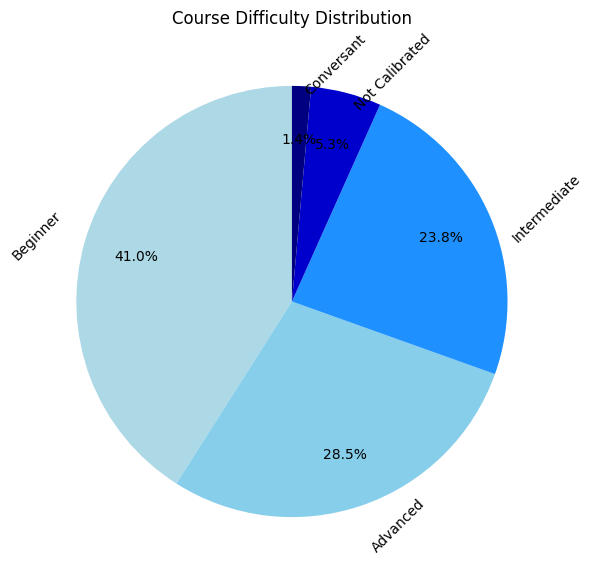

In [10]:
categories = df['Difficulty Level'].unique()
values = df['Difficulty Level'].value_counts().values

plt.figure(figsize=(7,7)) 

wedges, texts, autotexts = plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=90, pctdistance=0.75, colors=['#ADD8E6', '#87CEEB', '#1E90FF','#0000CD','#000080'])

for text in texts:
    text.set_rotation(45)

plt.title('Course Difficulty Distribution')

plt.show()


COURSE RATING DISTRIBUTION

In [12]:
df['Course Rating'].value_counts()

Course Rating
4.7               740
4.6               623
4.8               598
4.5               389
4.4               242
4.9               180
4.3               165
4.2               121
5                  90
4.1                85
Not Calibrated     82
4                  51
3.8                24
3.9                20
3.6                18
3.7                18
3.5                17
3.4                13
3                  12
3.2                 9
3.3                 6
2.9                 6
2.6                 2
2.8                 2
2.4                 2
1                   2
2                   1
2.5                 1
3.1                 1
1.9                 1
2.3                 1
Name: count, dtype: int64

In [13]:
#Ignoring rows with rating = "Not Calibrated" and convert the rest on them to float
df = df[df['Course Rating'] != 'Not Calibrated']
df['Course Rating'] = df['Course Rating'].astype(float)

In [14]:
df.drop_duplicates(inplace=True)

C:\Users\Surbhit Kumar\AppData\Local\Temp\ipykernel_40284\3423189818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='Course Rating',palette='plasma')


Text(0.5, 1.0, 'Courses count by rating')

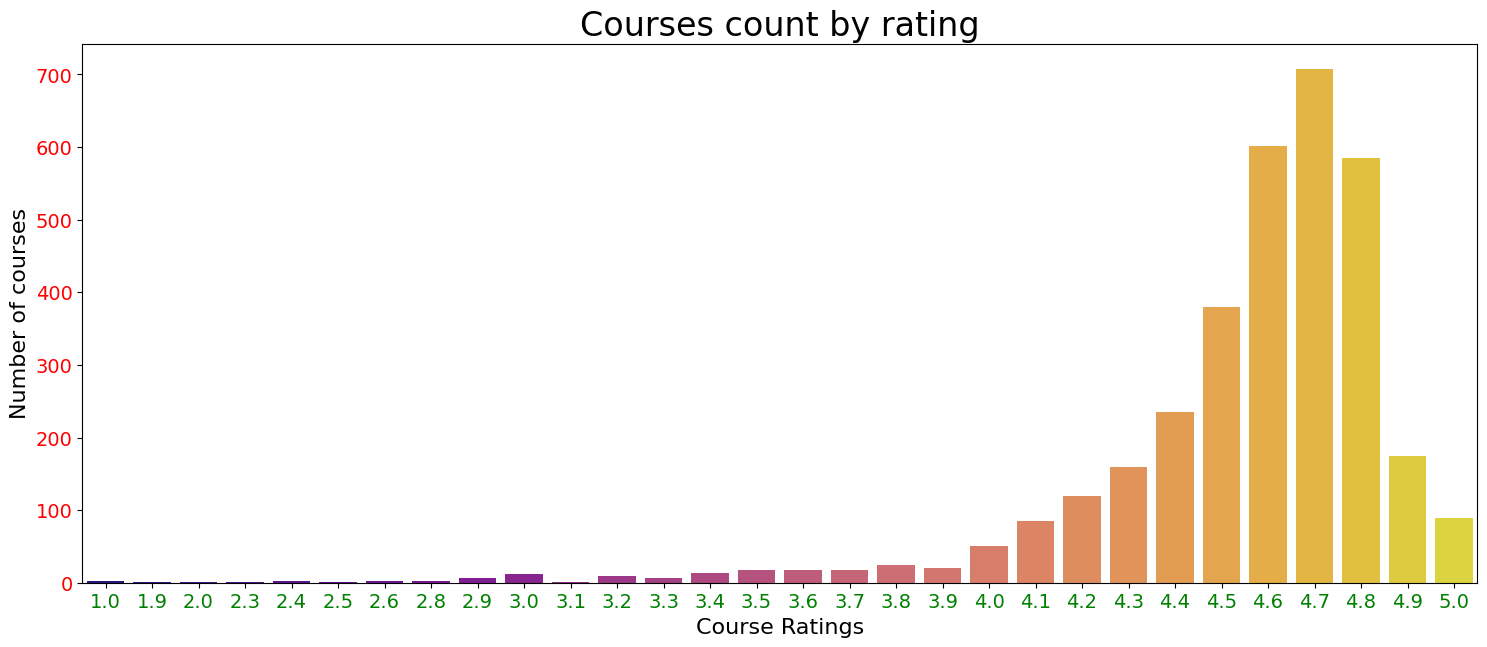

In [16]:
plt.figure(figsize=(18,7))
sns.countplot(data=df,x='Course Rating',palette='plasma')
plt.xlabel('Course Ratings',fontsize='16')
plt.ylabel('Number of courses',fontsize='16')
plt.xticks(fontsize='14',color='green')
plt.yticks(fontsize='14',color='red')
plt.title("Courses count by rating",fontsize=24)

Using TFIDF Vectorizer - Searching on the basic of course names

In [17]:
cv = TfidfVectorizer()
tfidf_matrix = cv.fit_transform(df['Course Name'])

In [18]:
course_user = df.pivot_table(columns='Course Name',values='Course Rating')
course_user.head()

Course Name,"""Making"" Progress Teach-Out",3-Axis Machining with Autodesk Fusion 360,3D Art and Audio Pipeline,3D CAD Application,3D CAD Fundamental,3D Data Visualization for Science Communication,3D Graphics in Android: Sensors and VR,3D Interaction Design in Virtual Reality,3D Interactions and Navigation,3D Model Creation with Autodesk Fusion 360,...,Writing in English at University,Writing in First Person Point of View,Writing your World: Finding yourself in the academic space,e-Learning Ecologies: Innovative Approaches to Teaching and Learning for the Digital Age,eHealth: More than just an electronic record,iOS App Development Basics,iOS App Store & In-App Purchases,iOS Project: Transreality Game,iPad Music Player in XD,idea 2 IMPACT: An Introduction to Translating Assistive Health Technologies and Other Products
Course Rating,4.2,4.9,4.3,4.9,4.6,4.3,4.6,4.5,4.5,4.7,...,4.7,4.6,4.7,4.2,4.5,4.2,4.5,4.9,4.4,1.0


In [19]:
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
indices = pd.Series(df.index,index=df['Course Name'])

titles = df['Course Name']
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(titles)

In [29]:
def get_recommendations(input_string):
    input_vector = vectorizer.transform([input_string])
    cosine_similarities = cosine_similarity(input_vector, tfidf_matrix).flatten()
    
    # Sort courses based on similarity scores
    sim_scores = sorted(enumerate(cosine_similarities), key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[:10]  # Top 10 results
    
    # Extract course titles and similarity scores
    course_indices = [i[0] for i in sim_scores]
    similarity_scores = [round(i[1], 3) for i in sim_scores]
    #Return course name, desc, uni, rating, difficulty level and sim score
    recommendations = list(zip(titles.iloc[course_indices],
                                df['University'].iloc[course_indices],
                                df['Course Rating'].iloc[course_indices],
                                df['Course Description'].iloc[course_indices],
                                df['Difficulty Level'].iloc[course_indices],
                                similarity_scores))
    return recommendations

In [30]:
recos = get_recommendations("programming")

In [37]:
recommended_data = [(title, uni, rating, fill(desc, width=150), level, score) for title, uni, rating, desc, level, score in recos]

headers = ["Title", "University", "Rating", "Description", "Level", "Score"]
print(tabulate(recommended_data, headers=headers, tablefmt="fancy_grid"))

╒══════════════════════════════════════╤════════════════════════════════════════════════════╤══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╤══════════════╤═════════╕
│ Title                                │ University                                         │   Rating │ Description                                                                                                                                            │ Level        │   Score │
╞══════════════════════════════════════╪════════════════════════════════════════════════════╪══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪══════════════╪═════════╡
│ R Programming                        │ Johns Hopkins University                           │      4.4 │ In this course you will learn how to program i

In [3]:
from recommendation import RecommendationClass

path = "data/data.csv"

ImportError: cannot import name 'RecommendationClass' from 'recommendation' (d:\Projects\Movie-RecSys\recommendation.py)

In [41]:
recs.get_recommendations("Machine Learning")

AttributeError: 'Recomendations' object has no attribute 'get_recommendations'